

## The Data

I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## About the data

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we will build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [2]:
import pandas as pd

In [4]:
data_info = pd.read_csv('C:/Users/Vishesh Sharma/Downloads/Loan_Repayment_Prediction Project/lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df = pd.read_csv('C:/Users/Vishesh Sharma/Downloads/Loan_Repayment_Prediction Project/lending_club_loan_two.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Exploratory Data Analysis

**GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


**Since we will be attempting to predict loan_status, let us create a countplot.**

Text(0, 0.5, 'Count')

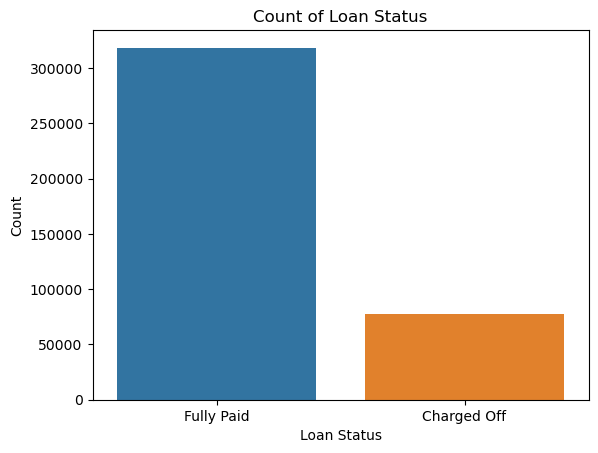

In [11]:
sns.countplot(x='loan_status', data=df)
plt.title('Count of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

Looks like the data is unbalanced as the number of Fully paid entries are much more than Charged Off entries. This means that when in future we will check how our model did, we cannot use accuracy as a parameter. Also we should focus more on what the precision and recall score of the charged off parameter rather than Fully paid parameter.

**Let's create a histogram of the loan_amnt column and see if there is anything we can understand from it.**

Text(-12.805555555555555, 0.5, 'Count')

<Figure size 1800x600 with 0 Axes>

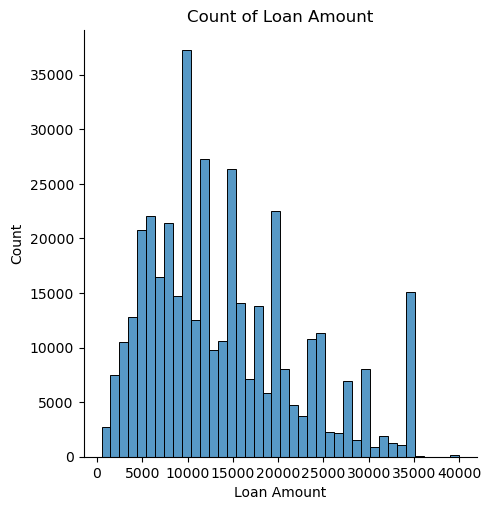

In [16]:
plt.figure(figsize=(18,6))
sns.displot(x='loan_amnt', data=df, bins=40)
plt.title('Count of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

We can observe from the above histogram that most number of loan amounts were in the range of 5000 to 10,000 dollars and also that the most loans were given at round figures like 10000, 15000, 20000, 30000 that is why we can see peaks at these amounts.

----
**Let's explore correlation between the continuous feature variables.**

In [17]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


It is difficult to read and interpret these values. This can be made easy to understand using a heatmap.

**Let's visualize this using a heatmap.**

<AxesSubplot:>

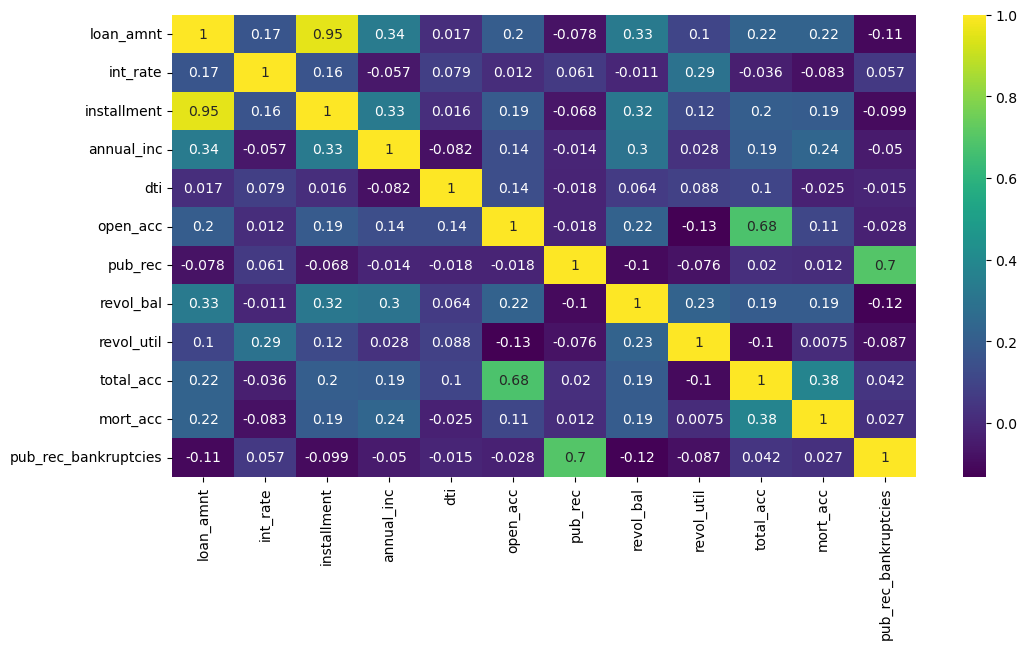

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

We can notice:<br>
1) Almost perfect correlation between the "installment" and "loan_amnt" feature. Let's expolore this features in detail <br>
2) Some correlation between "total_acc" and "open_acc" <br>
3) Some correlation between "pub_rec_bankruptcies" and "pub_rec" <br>

In [28]:
feat_info('installment')
print('\n')

feat_info('loan_amnt')
print('\n')

feat_info('pub_rec_bankruptcies')
print('\n')

feat_info('pub_rec')

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


Number of public record bankruptcies


Number of derogatory public records


Text(0, 0.5, 'Loan Amount')

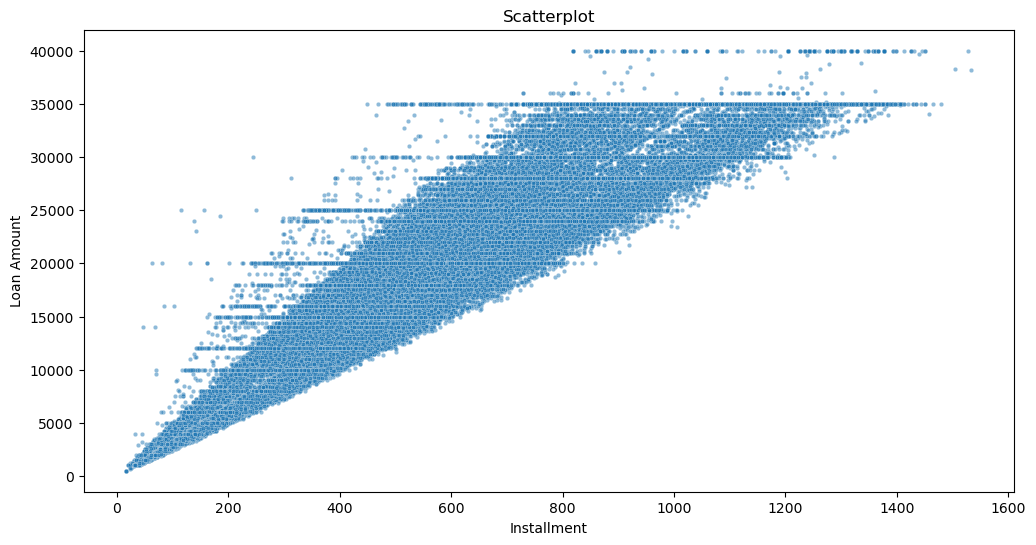

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='installment', y='loan_amnt', data=df, s=10, alpha=0.5)
plt.title('Scatterplot')
plt.xlabel('Installment')
plt.ylabel('Loan Amount')

We can observe some kind of linear relationship between them

----

**Now, let's create a boxplot showing the relationship between the loan_status and the loan_amnt.**

Text(0, 0.5, 'Loan Amount')

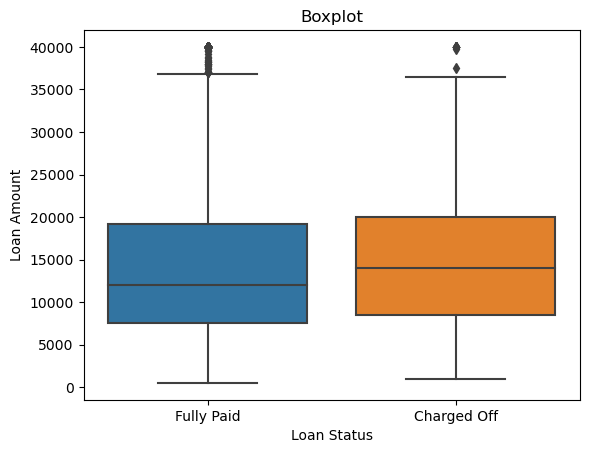

In [29]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Boxplot')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

We can observe that the average of loan amount for charged off loans is higher than the fully paid loans. This makes sense as it is difficult to pay high amount loans than lower amount loans and thus leading to more defaults

**Let's calculate the summary statistics for the loan amount, grouped by the loan_status to see what actually is the mean for each of them.**

In [30]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Charged Off's mean is almost 1300 $ higher as compared to Fully Paid's mean

**Now, let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [37]:
feat_info('grade')
print('\n')
feat_info('sub_grade')

LC assigned loan grade


LC assigned loan subgrade


In [32]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [34]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**Let's create a countplot per grade.**

Text(0, 0.5, 'Count')

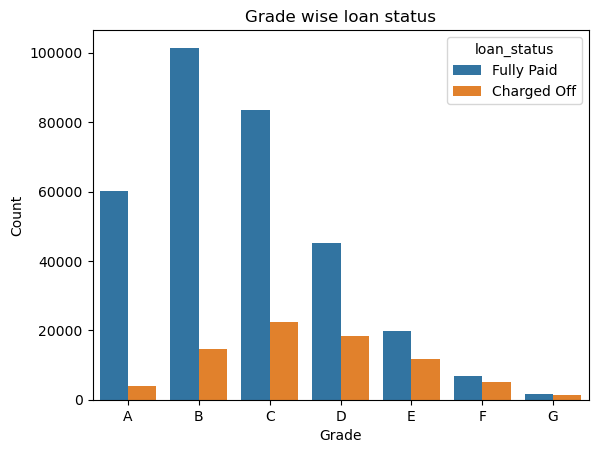

In [40]:
sns.countplot(x='grade', data=df, hue='loan_status', order='A B C D E F G'.split())
plt.title('Grade wise loan status')
plt.xlabel('Grade')
plt.ylabel('Count')

We can observe that most accounts are in the "B" and "C" grade

**Let's create a countplot per subgrade.**

Text(0, 0.5, 'Count')

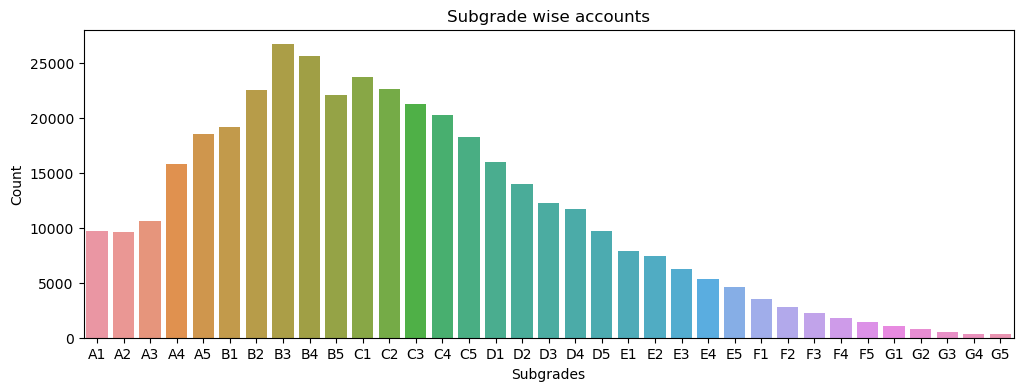

In [41]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df,
              order='A1 A2 A3 A4 A5 B1 B2 B3 B4 B5 C1 C2 C3 C4 C5 D1 D2 D3 D4 D5 E1 E2 E3 E4 E5 F1 F2 F3 F4 F5 G1 G2 G3 G4 G5'.split())
plt.title('Subgrade wise accounts')
plt.xlabel('Subgrades')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

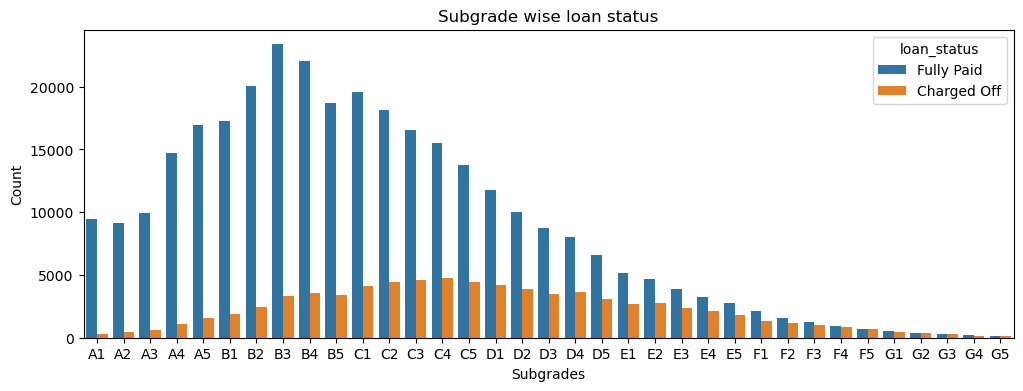

In [42]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',hue='loan_status', data=df,
              order='A1 A2 A3 A4 A5 B1 B2 B3 B4 B5 C1 C2 C3 C4 C5 D1 D2 D3 D4 D5 E1 E2 E3 E4 E5 F1 F2 F3 F4 F5 G1 G2 G3 G4 G5'.split())
plt.title('Subgrade wise loan status')
plt.xlabel('Subgrades')
plt.ylabel('Count')

It looks like "F" and "G" subgrades are not paying back that often 

**Let's recreate the countplot just for "F" and "G" subgrades.**

Text(0, 0.5, 'Count')

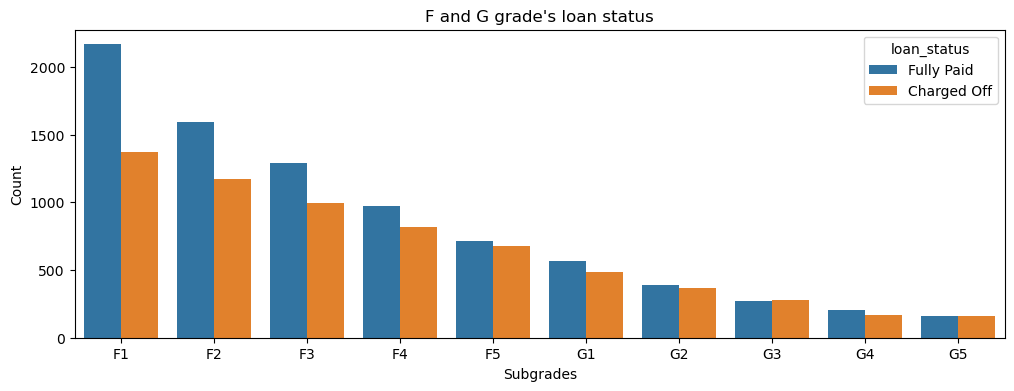

In [43]:
F_and_G=df[(df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',hue='loan_status', data=F_and_G, order='F1 F2 F3 F4 F5 G1 G2 G3 G4 G5'.split())
plt.title("F and G grade's loan status")
plt.xlabel('Subgrades')
plt.ylabel('Count')


We can see that these grades are not paying back there loans and the chances of getting repaid is almost 50%

**We should convert our loan_status column into boolen values so that it can be used in models and analysis. So, let's create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [44]:
def convert(item):
    if item =='Fully Paid':
        return 1
    elif item == 'Charged Off':
        return 0

df['loan_repaid'] = df['loan_status'].apply(convert)


In [47]:
pd.get_dummies(df['loan_status'], drop_first=True)
#We use "drop_first = True" as the information from one column can give the information about the second column so no
# need to keep both columns. It infact, might make our model to overfit or underfit

,Fully Paid
0,1
1,1
2,1
3,1
4,0
...,...
396025,1
396026,1
396027,1
396028,1


In [49]:
#Let's check if it worked
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Let's create a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

<AxesSubplot:>

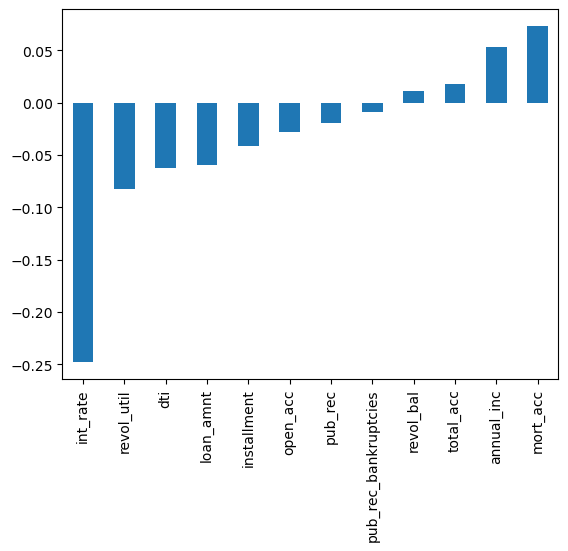

In [50]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

---
---
# Data PreProcessing

**Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [51]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns and decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

The length of the dataframe?

In [53]:
len(df)

396030

**Missing values per column.**

In [54]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

We can see that columns "emp_title", "emp_length", "title", "revol_util", "mort_acc", "pub_rec_banckruptcies" have null values. However, we are not able to see what percentage of the total data is missing.

**Let's convert this series in term of percentage of the total DataFrame**

In [55]:
((df.isnull().sum())/(len(df)))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Now it is easy to understand how much data we are missing. <br>
Let's examin each of these columns one by one.

**Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [56]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


Unique employment job titles

In [57]:
df['emp_title'].nunique()

173105

In [58]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

There are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [59]:
df.shape

(396030, 28)

In [60]:
df.drop('emp_title',axis=1,inplace=True)

In [61]:
df.shape

(396030, 27)

**Let's create a count plot of the emp_length feature column.**

In [62]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [63]:
#Let's sort these 
emp_length_labels=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years','10+ years']
emp_length_labels

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

Text(0, 0.5, 'Count')

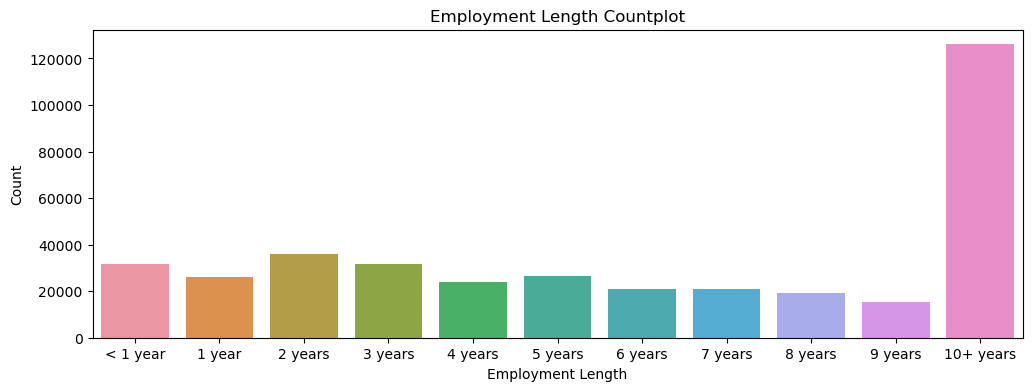

In [65]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_labels)
plt.title("Employment Length Countplot")
plt.xlabel('Employment Length')
plt.ylabel('Count')

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

Text(0, 0.5, 'Count')

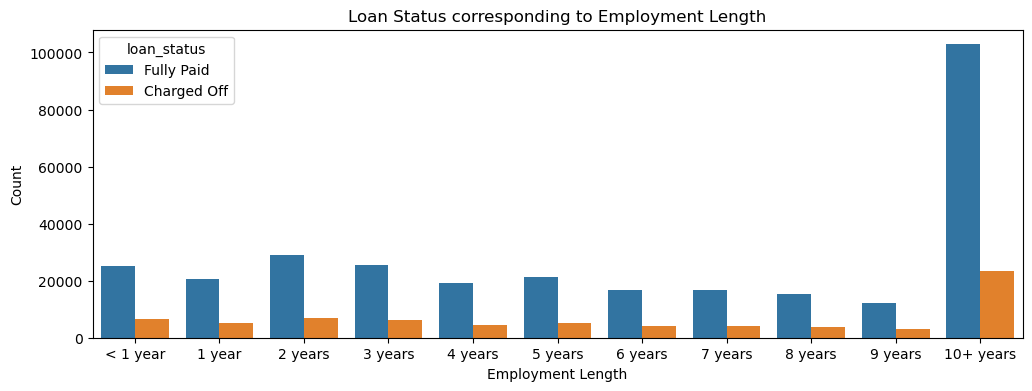

In [66]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, hue='loan_status', order=emp_length_labels)
plt.title("Loan Status corresponding to Employment Length")
plt.xlabel('Employment Length')
plt.ylabel('Count')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, let us find the percentage of charge offs per category. This will tell us what percent of people per employment category didn't pay back their loan.

In [67]:
emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_amnt']

In [68]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_amnt']

In [69]:
emp_co/(emp_fp)

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_amnt, dtype: float64

In [70]:
data1=emp_co/(emp_fp)

<AxesSubplot:xlabel='emp_length'>

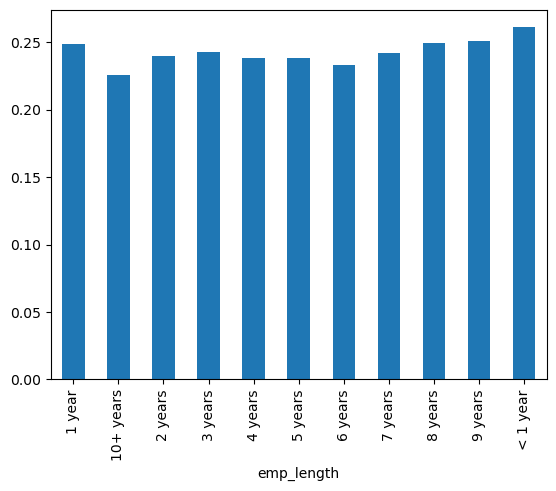

In [71]:
data1.plot(kind='bar')

We can see that charge off rates are extremely similar across all employment lengths. Let's drop the emp_length column.

In [72]:
df.shape

(396030, 27)

In [73]:
df.drop('emp_length', axis=1,inplace=True)

In [74]:
df.shape

(396030, 26)

Let's see what feature columns still have missing data.

In [75]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Let's review the title column vs the purpose column.**

In [76]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [77]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

The title column is simply a string subcategory/description of the purpose column. Let's drop the title column.

In [78]:
df.drop('title', axis=1, inplace=True)

In [79]:
df.shape

(396030, 25)

**Let us now look at mort_acc feature**

In [80]:
feat_info('mort_acc')

Number of mortgage accounts.


In [81]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**Let's review the other columns to see which most highly correlates to mort_acc**

In [82]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc , this makes sense!

In [83]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [84]:
data2=df.groupby(['total_acc']).mean()['mort_acc']
data2

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.

In [85]:
def fill_mort_value(totalacc, mortacc):
    if np.isnan(mortacc):
        return data2[totalacc]
    else: return mortacc 
    

In [86]:
df['mort_acc'] = df.apply(lambda x: fill_mort_value(x['total_acc'],x['mort_acc']),axis=1)

In [87]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

"revol_util" and the "pub_rec_bankruptcies" columns have missing data points, but they account for less than 0.5% of the total data. Let's remove the rows that are missing those values in those columns.

In [88]:
df.dropna(axis=0, inplace=True)

In [89]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

In [90]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


**"term" feature**

Let's convert the term feature into either a 36 or 60 integer numeric data type.

In [91]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [92]:
df['term']=df['term'].map({' 36 months': 36, ' 60 months': 60})


In [93]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**"grade" feature**

We already know grade is part of sub_grade, so let us just drop the grade feature.

In [94]:
df.shape

(395219, 25)

In [95]:
df.drop('grade', axis=1, inplace=True)

In [96]:
df.shape

(395219, 24)

**"sub_grade" feature**<br>
Let's convert the "subgrade" column into dummy variables. Then concatenate these new columns to the original dataframe.

In [97]:
subgrade_dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

In [98]:
df=pd.concat([df.drop('sub_grade',axis=1), subgrade_dummies], axis=1)

In [99]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [100]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

**"verification_status", "application_type", "initial_list_status", "purpose" features**<br>
Let's convert these columns: ("verification_status", "application_type", "initial_list_status", "purpose") into dummy variables and concatenate them with the original dataframe.

In [101]:
bulk_dummies=pd.get_dummies(df[['verification_status','application_type', 'initial_list_status','purpose']],drop_first=True)

In [102]:
df=pd.concat([df.drop(['verification_status','application_type', 'initial_list_status','purpose'],axis=1),bulk_dummies],axis=1)

In [103]:
df.shape

(395219, 71)

**"home_ownership" feature**


In [104]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Let's convert these to dummy variables. Replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.

In [105]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'],'OTHER')

In [106]:
home_ownership_dummies=pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df.drop('home_ownership',axis=1),home_ownership_dummies],axis=1)

In [107]:
df.shape

(395219, 73)

**"address" feature** <br>
Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [108]:
df['zip_code']=df['address'].apply(lambda x: x.split()[-1])

In [109]:
zip_code_dummies=pd.get_dummies(df['zip_code'],drop_first=True)

In [110]:
df=pd.concat([df.drop('zip_code',axis=1),zip_code_dummies],axis=1)

In [111]:
df.drop('address',inplace=True,axis=1)

In [112]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

**"issue_d" feature**

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date. Let's drop this feature.

In [113]:
df.drop('issue_d',axis=1,inplace=True)

**"earliest_cr_line" feature**<br>
This appears to be a historical time stamp feature. Let's extract the year from this feature.

In [114]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x: x.split('-')[-1])

In [115]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [116]:
df['earliest_cr_year']=df['earliest_cr_year'].apply(lambda x: int(x))

In [117]:
df.select_dtypes(['object'])

,loan_status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Charged Off
...,...
396025,Fully Paid
396026,Fully Paid
396027,Fully Paid
396028,Fully Paid


----
-----
## Train Test Split

In [118]:
from sklearn.model_selection import train_test_split

Let's drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [119]:
df.drop('loan_status', axis=1, inplace=True)

In [120]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999


Set X and y variables to the .values of the features and label.

In [121]:
X=df.drop('loan_repaid', axis=1).values

In [122]:
y= df['loan_repaid'].values

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

In [124]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
scaler = MinMaxScaler()

In [126]:
X_train = scaler.fit_transform(X_train)

In [127]:
X_test = scaler.transform(X_test)

----
-----
## ANN

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [129]:
model = Sequential()

#input layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

#hidden layers
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units=1, activation='sigmoid'))

# Remember to compile()
model.compile(loss='binary_crossentropy', optimizer='adam')

**Let's fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting.**

In [130]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=25, validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 12s 5ms/step - loss: 0.3010 - val_loss: 0.2653
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2652 - val_loss: 0.2633
Epoch 3/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2627 - val_loss: 0.2631
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2614 - val_loss: 0.2619
Epoch 5/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2607 - val_loss: 0.2623
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2603 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2598 - val_loss: 0.2616
Epoch 8/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2595 - val_loss: 0.2613
Epoch 9/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2592 - val_loss: 0.2615
Epoch 10/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.25

**Evaluating Model Performance.**

In [131]:
losses =pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.301042,0.265313
1,0.265207,0.263271
2,0.262654,0.263137
3,0.261422,0.261875
4,0.260749,0.262280
5,0.260263,0.261634
6,0.259801,0.261585
7,0.259483,0.261280
8,0.259219,0.261453
9,0.258894,0.261055


<AxesSubplot:>

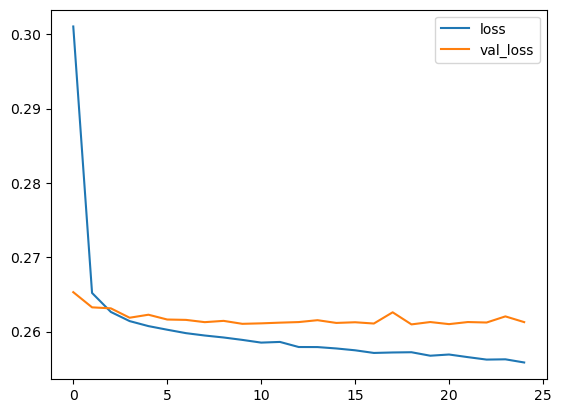

In [132]:
losses[['loss','val_loss']].plot()

In [141]:
from sklearn.metrics import classification_report, confusion_matrix

In [142]:
y_test

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [143]:
predictions=(model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 4s 2ms/step


In [144]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [145]:
print(confusion_matrix(y_test, predictions))

[[ 6819  8839]
 [   79 63307]]


----
-----
## Random Forests

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
rfc = RandomForestClassifier(n_estimators=200)

In [149]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [151]:
predictions = rfc.predict(X_test)

In [152]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.62     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.78     79044
weighted avg       0.90      0.89      0.87     79044



In [153]:
print(confusion_matrix(y_test,predictions))

[[ 7070  8588]
 [  239 63147]]


-----
------
## Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression

In [157]:
lg=LogisticRegression(max_iter=100)

In [158]:
lg.fit(X_train,y_train)

C:\Users\Vishesh Sharma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
predictions= lg.predict(X_test)

In [160]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [161]:
print(confusion_matrix(y_test,predictions))

[[ 7015  8643]
 [  214 63172]]
